# **Imports**

In [50]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# **Data loading and Analysis**

In [51]:
dataset=fetch_openml('mnist_784')

In [52]:
data=dataset.data
target=dataset.target

In [53]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [54]:
data.shape

(70000, 784)

In [55]:
np.unique(target).shape

(10,)

# **Data Processing**

In [56]:
data.shape

(70000, 784)

In [57]:
data=data-np.mean(data,axis=0)

- we have to center the data to get accurate results of variance distribution for each class around origin

# **Splitting Data**

In [58]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=40)

# **Dimensionality Reduction**

In [59]:
pca2=PCA(n_components=2)
x_2dim=pca2.fit_transform(x_train)

In [60]:
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [61]:
cols=y_train.copy()
for i in range(0,len(cols)):
  cols[i]=int(cols[i])

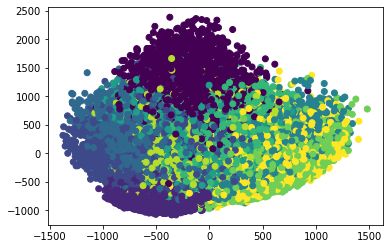

In [62]:
plt.scatter(x_2dim[:,1],x_2dim[:,0],c=cols)

**2 Dimensions are not sufficient to scatter the plot and classify easily so we use more dimenstions**

In [63]:
pca=PCA(n_components=0.98)
x_train=pca.fit_transform(x_train)

In [64]:
x_test=pca.transform(x_test)

In [65]:
x_train.shape

(52500, 260)

In [66]:
pca.components_

array([[ 1.10260887e-19,  9.71445147e-17,  1.11022302e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.68808134e-20,  1.38777878e-17,  2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.23349948e-19,  0.00000000e+00,  2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.90368298e-18,  2.79290480e-16, -2.68882139e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.87971339e-18,  3.42607887e-17,  1.21430643e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.70531651e-18, -6.33174069e-17, -2.90566182e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [67]:
pca.components_.shape

(260, 784)

- Took 260 principal components which contain 98% share of variance with 2 percent of data loss. we traded bias with computation time and also increases interpretability

In [68]:
np.sort(pca.explained_variance_ratio_)

array([0.00017994, 0.00018175, 0.00018245, 0.00018383, 0.00018486,
       0.00018569, 0.00018615, 0.00018706, 0.00018854, 0.00018889,
       0.00019109, 0.00019165, 0.00019291, 0.00019397, 0.00019725,
       0.00019799, 0.00020101, 0.00020153, 0.00020298, 0.00020539,
       0.00020646, 0.00020877, 0.00020937, 0.00021177, 0.00021257,
       0.00021397, 0.00021553, 0.00021668, 0.00021877, 0.00022122,
       0.00022263, 0.00022596, 0.00022687, 0.00022815, 0.00023149,
       0.00023216, 0.00023532, 0.00023645, 0.00023823, 0.0002394 ,
       0.00024051, 0.00024221, 0.00024308, 0.00024693, 0.00024761,
       0.0002508 , 0.00025198, 0.00025313, 0.00025539, 0.00025584,
       0.00025771, 0.00026097, 0.00026406, 0.00026511, 0.00026562,
       0.00026777, 0.00027289, 0.00027394, 0.00027805, 0.00028099,
       0.00028259, 0.0002859 , 0.00029158, 0.00029309, 0.00029465,
       0.00029473, 0.00030008, 0.00030107, 0.00030386, 0.00030701,
       0.00030922, 0.00031151, 0.00031463, 0.00031642, 0.00031

# **Model Building** 


# **Logistic Regression**




In [69]:
 lr=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=200,C=0.1)

In [70]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
lr.score(x_train,y_train)

0.9308761904761905

In [72]:
lr.score(x_test,y_test)

0.9141142857142858

# **Decision Tree Classifier**

- Instability is reduced by **PCA**

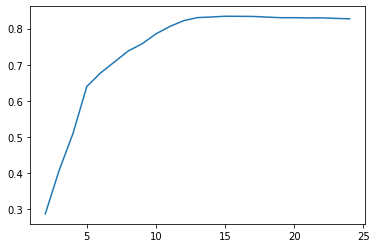

In [73]:
scores=[]
dim=[]
for dims in range(2,25):
  dtc=DecisionTreeClassifier(max_depth=dims)
  dtc.fit(x_train,y_train)
  dim.append(dims)
  score=dtc.score(x_test,y_test)
  scores.append(score)
plt.plot(dim,scores)

- if depth is none it will overfit the data which tries to classify each data point correctly using different types of threshold values but it is not guaranted about performance on test data so early stopping is used with depth as a parameter and calculated the graph above and found that the model performs well for depth 16

In [74]:
np.argmax(scores)+2

15

In [75]:
scores[14]

0.8339428571428571

- If we take less dimenstions it will underfit and if we take more dimenstions it will overfit best to take is 16 which gives 0.84 as test error which is better when compared which is early stopping.

In [76]:
scores

[0.2876,
 0.40794285714285716,
 0.5097714285714285,
 0.6398285714285714,
 0.6776,
 0.7079428571428571,
 0.7382285714285715,
 0.7580571428571429,
 0.7854285714285715,
 0.8058857142857143,
 0.8218857142857143,
 0.8304,
 0.8321142857142857,
 0.8341714285714286,
 0.8339428571428571,
 0.8336,
 0.8318857142857143,
 0.8301714285714286,
 0.8301714285714286,
 0.8294857142857143,
 0.8297142857142857,
 0.8282285714285714,
 0.8270857142857143]

# **Random Forest Classifier** 

Best to choose bagging or Pasting because the dimenstions are too high and to reduce the computation time with good performance.


- Bagging is prefered because of its training with different sets for each Decision Tree



In [77]:
x_train.shape

(52500, 260)

In [78]:
bc=RandomForestClassifier(max_depth=16,n_estimators=500,max_samples=300,bootstrap=True,n_jobs=-1)

In [79]:
bc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=300,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [80]:
bc.score(x_train,y_train)

0.8545714285714285

In [81]:
bc.score(x_test,y_test)

0.8457714285714286

In [82]:
bc.feature_importances_

array([0.05027497, 0.04494132, 0.01526699, 0.0288381 , 0.02832178,
       0.02210029, 0.01613768, 0.01843887, 0.0061558 , 0.00869334,
       0.00515515, 0.00818117, 0.00775632, 0.01150162, 0.01014992,
       0.00809529, 0.00732239, 0.00466099, 0.00603095, 0.00691386,
       0.00506846, 0.00501492, 0.00623932, 0.00435552, 0.00359296,
       0.00657113, 0.00574113, 0.00431853, 0.00526026, 0.00283569,
       0.00359685, 0.00416429, 0.00395986, 0.0054243 , 0.00480531,
       0.00323956, 0.00310864, 0.00312257, 0.00348707, 0.00392562,
       0.00382139, 0.00370403, 0.00353489, 0.00328861, 0.00337944,
       0.00280175, 0.00316136, 0.00300888, 0.00314832, 0.00331816,
       0.00390697, 0.002862  , 0.00306371, 0.00336678, 0.00277861,
       0.00277872, 0.00267062, 0.0033991 , 0.0031937 , 0.00305788,
       0.00300136, 0.00294451, 0.00313502, 0.00279426, 0.00254888,
       0.0035881 , 0.00307908, 0.0031063 , 0.00325532, 0.00257988,
       0.00229283, 0.0027715 , 0.0031564 , 0.00331882, 0.00269

**from above we can say that Random Forest Classifier is best for classification which trains model in a discrete way which can easily rectify the problems with normal decision tree**

# **KNN Classifier**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [84]:
knn=KNeighborsClassifier(n_neighbors=102,algorithm='brute')

In [85]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=102, p=2,
                     weights='uniform')

In [86]:
predict_knn=knn.predict(x_test)

In [87]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1710
           1       0.87      0.99      0.93      1961
           2       0.99      0.90      0.94      1814
           3       0.94      0.94      0.94      1791
           4       0.97      0.92      0.94      1734
           5       0.93      0.93      0.93      1501
           6       0.96      0.98      0.97      1729
           7       0.93      0.94      0.93      1806
           8       0.98      0.84      0.91      1730
           9       0.90      0.93      0.91      1724

    accuracy                           0.94     17500
   macro avg       0.94      0.94      0.94     17500
weighted avg       0.94      0.94      0.94     17500



# **Voting Classifier**


1.   Voting classifier judges the answer by by judging all the classifier and takes the higest vote. here soft voting is done which takes the probability as the criteria of each classifier

In [89]:
dt=DecisionTreeClassifier(max_depth=16)

In [90]:
vc=VotingClassifier(estimators=[('lr',lr),('bc',bc),('dt',dt),('kn',knn)],voting='soft')

In [91]:
vc.estimators

[('lr',
  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=200,
                     multi_class='multinomial', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('bc',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=16, max_features='auto',
                         max_leaf_nodes=None, max_samples=300,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=500,
                         n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                         warm_start=False)),
 ('dt',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='g

In [92]:
vc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=200,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('bc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=...
                                        

In [93]:
vc.score(x_train,y_train)

0.9752380952380952

In [95]:
vc.score(x_test,y_test)

0.9335428571428571

In [96]:
total_data=np.concatenate((x_train,x_test),axis=0)

In [97]:
total_target=np.concatenate((y_train,y_test),axis=0)

In [98]:
vc.score(total_data,total_target)

0.9648142857142857

# **Conclusion**

**The higest accuray we got is by using Voting classifier with soft voting by using Random Forest classifier , Logistic Regression, Decision Tree Classifier which is 95% for the dataset taken. Adding KNN Classifier increased it to 96%**